![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 1. Introduction

We have seen that Sliding Window Technique is computationally expensive and inefficient due to the very high number of bounding box positions. Hence, in order to speed up the object detection, we have two options:

1. Use a shallow network with less no of parameters $\implies$ CNN model may not perform well
2. Reduce the no of bounding boxes
    - No need to pass bounding boxes with "Background" class (since CNN do not learn anything)
    - No need for duplicate bounding boxes for same object

**RCNN (Regions with Convolutional Neural Networks)** tries to get only the regions of image in which there is a high probability of an object. Thus, RCNN reduces the no of regions that we pass into the CNN.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 2. Object Detection with RCNN

R-CNN (Regions with Convolutional Neural Networks) is a pioneering deep learning method for object detection that was introduced by Ross Girshick, Jeff Donahue, Trevor Darrell, and Jitendra Malik in 2014. It brought significant improvements to object detection by combining region proposals with Convolutional Neural Networks (CNNs). The main idea is to generate region proposals, use a CNN to extract features from each proposal, and then classify these features into object categories or background.

## 1. Steps in R-CNN

1. **Region Proposal Generation:**

    - **Selective Search:** R-CNN uses a region proposal algorithm called Selective Search to generate around 2000 region proposals (bounding boxes) from an input image. Selective Search combines the advantages of both exhaustive search and segmentation to find regions that are likely to contain objects.

2. **Feature Extraction:**

    - Each of the 2000 region proposals is then warped into a fixed-size (e.g., 227x227) image patch.
    - These patches are fed into a pre-trained CNN (like AlexNet) to extract a fixed-length feature vector for each region. The CNN acts as a feature extractor.

3. **Classification:**

    - The extracted features are then passed to a set of class-specific linear SVMs (Support Vector Machines) to classify each region proposal into one of the object classes or background (non-object).

4. **Bounding Box Regression:**

    - To refine the bounding box coordinates, a bounding box regressor is trained to predict more accurate bounding boxes for each region proposal. This step improves the localization accuracy of the detected objects.

## 2. Detailed Workflow

1. **Input Image:**

    - The process starts with an input image.

2. **Region Proposal:**

    - Use Selective Search to generate around 2000 region proposals. Each proposal is a potential region that might contain an object.

3. **Warping Regions:**

    - Each region proposal is resized to a fixed size required by the CNN (e.g., 227x227 pixels).

4. **CNN Feature Extraction:**

    - Pass each resized region proposal through a CNN. The CNN extracts high-level features from the region. The output from a fully connected layer of the CNN is used as the feature vector.

5. **Classification with SVM:**

    - Each feature vector is classified using class-specific linear SVMs. Each SVM is trained to detect a specific class, and there is an additional SVM to detect the background.

6. **Bounding Box Regression:**

    - For each classified region, a bounding box regressor adjusts the proposed bounding box coordinates to better fit the object.


![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 3. Region Proposal Generation using Selective Search Algorithm

The problem of object localization is the most difficult part of object detection. One approach is that we use sliding window of different size to locate objects in the image. This approach is called Exhaustive Search. This approach is computationally very expensive as we need to search for object in thousands of windows even for small image size. Some optimization has been done such as taking window sizes in different ratios (instead of increasing it by some pixels). But even after this due to number of windows it is not very efficient.

## 1. Selective Search Algorithm Workflow

Selective Search algorithm uses both Exhaustive Search and Segmentation for generating region proposals. Its workflow is as below:

### 1. Generate initial sub-segmentation of input image

Uses the method described by *Felzenszwalb et al* in his paper "Efficient Graph-Based Image Segmentation".

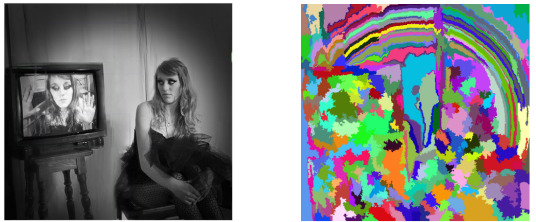

In [1]:
# Generate initial sub-segmentation of input image

from IPython import display
display.Image("data/images/CV_06_Intro_to_Object_Detection-13.jpg")

### 2. Recursively combine the smaller similar regions into larger ones

We use Greedy algorithm to combine similar regions to make larger regions. The algorithm is written below:

1. From set of regions, choose two that are most similar.
2. Combine them into a single, larger region.
3. Repeat the above steps for multiple iterations.

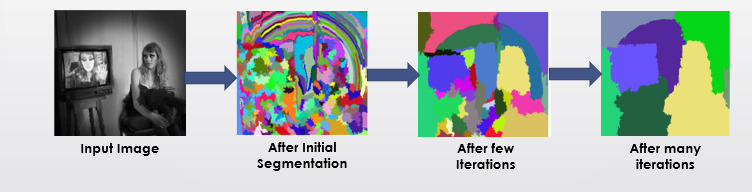

In [2]:
# Recursively combine the smaller similar regions into larger ones

from IPython import display
display.Image("data/images/CV_06_Intro_to_Object_Detection-14.jpg")

### 3. Use the segmented region proposals to generate candidate object locations

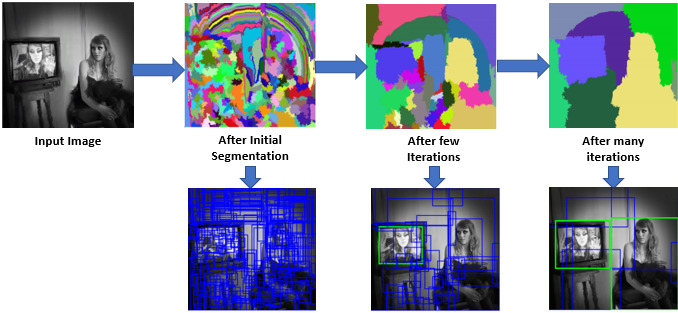

In [3]:
# Use the segmented region proposals to generate candidate object locations

from IPython import display
display.Image("data/images/CV_06_Intro_to_Object_Detection-15.jpg")

Selective Search Algorithm is described in a nutshell in the following figure:

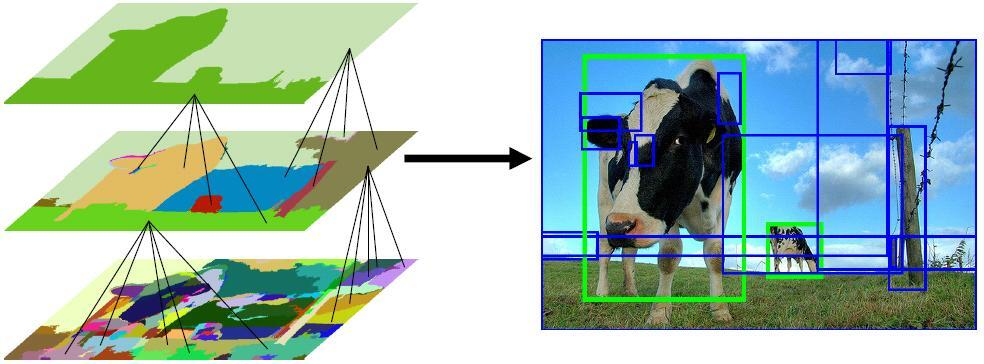

In [4]:
# Selective Search Algorithm in a nutshell

from IPython import display
display.Image("data/images/CV_06_Intro_to_Object_Detection-16.jpg")

**Note**

The Selective Search paper considers five types of similarity when combining the initial small segmentation into larger ones. These similarities are:

1. Color Similarity
2. Texture Similarity
3. Size Similarity
4. Shape or Fill Similarity
5. Linear combination of above measures

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)